In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
dir="/proj/berzelius-2021-29/users/x_arnel/herpes/herpes-ppi/data/"


In [26]:
string="_trembl_id25"
df_read_pdockq2=pd.read_csv(dir+'//multimer'+string+'-pdockq_v21.csv',names=["foo","id","Name","Chain","pDockQ2","ifPAE","ifPAEnorm","ifPLDDT","ifRes"],sep=",")
#df_read_pdockq2[["r","m","model","x","v","p","run"]]=df_read_pdockq2["Name"].str.split("[_\.]",expand=True)
#df_read_pdockq2['Rank'] = df_read_pdockq2.groupby(['id','run','model'])['pDockQ2'].rank(ascending=False,method="first")
df_read_pdockq2=df_read_pdockq2.loc[df_read_pdockq2['Chain']=='B']
#df_read_pdockq2=df_read_pdockq2.loc[df_read_pdockq2['Rank']==1]
#df_read_pdockq2.drop(columns=['foo','Name','r','m','x','v','p'],inplace=True)
#df_read_pdockq2.drop(columns=['foo','Name','Chain','Rank','r','m','x','v','p'],inplace=True)
df_read_pdockq2

foo             id  \
0      multimer_trembl_id25  O00299_P04487   
2      multimer_trembl_id25  O00299_P04487   
4      multimer_trembl_id25  O00299_P04487   
6      multimer_trembl_id25  O00299_P04487   
8      multimer_trembl_id25  O00299_P04487   
...                     ...            ...   
17390  multimer_trembl_id25  Q9Y224_P10233   
17392  multimer_trembl_id25  Q9Y224_P10233   
17394  multimer_trembl_id25  Q9Y224_P10233   
17396  multimer_trembl_id25  Q9Y224_P10233   
17398  multimer_trembl_id25  Q9Y224_P10233   

                                       Name Chain   pDockQ2      ifPAE  \
0      unrelaxed_model_1_multimer_v3_pred_1     B  0.013127  19.331290   
2      unrelaxed_model_1_multimer_v3_pred_2     B  0.013948  19.023752   
4      unrelaxed_model_1_multimer_v3_pred_3     B  0.014023  17.541732   
6      unrelaxed_model_1_multimer_v3_pred_4     B  0.013757  18.458452   
8      unrelaxed_model_1_multimer_v3_pred_5     B  0.012843  19.980788   
...                                     ...   ...       ...        ...   
17390  unrelaxed_model_5_multimer_v3_pred_1     B  0.008968  26.196879   
17392  unrelaxed_model_5_multimer_v3_pred_2     B  0.008941  27.386736   
17394  unrelaxed_model_5_multimer_v3_pred_3     B  0.008556  28.748073   
17396  unrelaxed_model_5_multimer_v3_pred_4     B  0.009043  27.575620   
17398  unrelaxed_model_5_multimer_v3_pred_5     B  0.008919  26.141961   

       ifPAEnorm    ifPLDDT     ifRes  
0       0.211105  60.889677  0.128541  
2       0.216496  64.907041  0.140521  
4       0.245271  57.721500  0.141574  
6       0.226904  60.737961  0.137817  
8       0.200308  61.995657  0.124182  
...          ...        ...       ...  
17390   0.127182  37.832600  0.048116  
17392   0.117642  40.319762  0.047433  
17394   0.107939  34.594531  0.037341  
17396   0.116223  43.006579  0.049984  
17398   0.127648  36.710893  0.046861  

[8700 rows x 9 columns]

In [27]:

def readcsvs(string):
    
    df_read_ptm = pd.read_csv(dir+'/multimer'+string+'-ptm.csv',header=0,names=["foo","id","Name","ipTM","pTM","PAE","plDDT"])
    df_read_ptm["RankConf"]=df_read_ptm.ipTM*0.8+df_read_ptm.pTM*0.2
    df_read_ptm['Rank'] = df_read_ptm.groupby('id')['RankConf'].rank(ascending=False,method="first")
    df_read_ptm[["r","m","model","x","v","p","run","k"]]=df_read_ptm["Name"].str.split("[_\.]",expand=True)
    df_read_ptm.drop(columns=['foo','Name','r','m','x','v','p','k'],inplace=True)
        
    df_read_pdockq= pd.read_csv(dir+'//multimer'+string+'-pdockq.csv',header=0,names=["foo","id","Name","Num","Chain","pDockQ"])
    df_read_pdockq[["r","m","model","x","v","p","run"]]=df_read_pdockq["Name"].str.split("[_\.]",expand=True)
    df_read_pdockq['Rank'] = df_read_pdockq.groupby(['id','run','model'])['pDockQ'].rank(ascending=False,method="first")
    #df_read_pdockq=df_read_pdockq.loc[df_read_pdockq['Chain']=='B']
    df_read_pdockq=df_read_pdockq.loc[df_read_pdockq['Rank']==1]
    df_read_pdockq.drop(columns=['foo','Num','Name','Chain','Rank','r','m','x','v','p'],inplace=True)
    
    df_read_pdockq2=pd.read_csv(dir+'//multimer'+string+'-pdockq_v21.csv',names=["foo","id","Name","Chain","pDockQ2","ifPAE","ifPAEnorm","ifPLDDT","ifRes"],sep=",")
    df_read_pdockq2[["r","m","model","x","v","p","run"]]=df_read_pdockq2["Name"].str.split("[_\.]",expand=True)
    df_read_pdockq2['Rank'] = df_read_pdockq2.groupby(['id','run','model'])['pDockQ2'].rank(ascending=False,method="first")
    #df_read_pdockq2=df_read_pdockq2.loc[df_read_pdockq2['Chain']=='B']
    df_read_pdockq2=df_read_pdockq2.loc[df_read_pdockq2['Rank']==1]
    df_read_pdockq2.drop(columns=['foo','Name','Chain','Rank','r','m','x','v','p'],inplace=True)


    df_read_pdockq1=pd.read_csv(dir+'//multimer'+string+'-pdock_fd.csv',names=["foo","id","Name","pDockQ1"],sep=",")    
    df_read_pdockq1[["r","m","model","x","v","p","run"]]=df_read_pdockq1["Name"].str.split("[_\.]",expand=True)
    df_read_pdockq1.drop(columns=['foo','Name','r','m','x','v','p'],inplace=True)
    
        
    df_read=pd.merge(df_read_ptm,df_read_pdockq,on=['id','run','model'])
    df_read=pd.merge(df_read,df_read_pdockq2,on=['id','run','model'])
    df_read=pd.merge(df_read,df_read_pdockq1,on=['id','run','model'])
    
    
    filename=dir+'herpes-ppi/data/multimer'+string+'-PconsFoldSeek.csv'
    if os.path.isfile(filename) and os.path.getsize(filename) > 0:
        df_read_foldseek=pd.read_csv(dir+'//multimer'+string+'-PconsFoldSeek.csv',names=["foo","id","Name","FoldSeek1","FoldSeek2"],sep=",")    
        df_read_foldseek[["r","m","model","x","v","p","run"]]=df_read_foldseek["Name"].str.split("[_\.]",expand=True)
        df_read_foldseek.drop(columns=['foo','Name','r','m','x','v','p'],inplace=True)
        df_read=pd.merge(df_read,df_read_foldseek,on=['id','run','model']) 

    filename=dir+'herpes-ppi/data/multimer'+string+'-pconsdock.csv'
    if os.path.isfile(filename) and os.path.getsize(filename) > 0:
        df_read_pconsdock=pd.read_csv(dir+'herpes-ppi/data/multimer'+string+'-pconsdock.csv',names=["dir","Name","Num","Sum","PconsDock"])
        df_read_pconsdock[["r","m","model","x","v","p","run"]]=df_read_pconsdock["Name"].str.split("[_\.]",expand=True)
        #df_read_pconsdock[["d","id"]]=df_read_pconsdock["dir"].str.split("[\/]",expand=True)
        splits = df_read_pconsdock["dir"].str.split("[\/]", expand=True)
        df_read_pconsdock["id"] = splits[1]
        df_read_pconsdock.drop(columns=["dir",'Name','r','m','x','v','p'],inplace=True)
        df_read=pd.merge(df_read,df_read_pconsdock,on=['id','run','model'])
        
        
    print (string,len(df_read),len(df_read.columns),len(df_read.id.unique()))
    return (df_read)

In [28]:
df_family_dupl25=readcsvs("_family_dupl25")
#df_family_dupl25["FoldSeek1"]

_family_dupl25 8671 16 348


In [29]:
dir="/proj/berzelius-2021-29/users/x_arnel/herpes/herpes-ppi/data/"
df=readcsvs("")
df_family_dupl=readcsvs("_family_dupl")


df_subfamily_dupl=readcsvs("_subfamily_dupl")
df_order_dupl=readcsvs("_order_dupl")
df_genus_dupl=readcsvs("_genus_dupl")

df_family_id=readcsvs("_family_id")
df_subfamily_id=readcsvs("_subfamily_id")
df_order_id=readcsvs("_order_id")
df_genus_id=readcsvs("_genus_id")

df_family_id=readcsvs("_family_id")
df_family_dupl=readcsvs("_family_dupl")

df_sprot_dupl=readcsvs("_sprot_dupl")
df_sprot_id=readcsvs("_sprot_id")

df_25=readcsvs("25")
df_family_dupl25=readcsvs("_family_dupl25")
df_sprot_dupl25=readcsvs("_sprot_dupl25")
df_trembl_dupl25=readcsvs("_trembl_dupl25")

df_family_id25=readcsvs("_family_id25")
df_sprot_id25=readcsvs("_sprot_id25")
df_trembl_id25=readcsvs("_trembl_id25")


 347 16 347
_family_dupl 347 16 347
_subfamily_dupl 345 16 345
_order_dupl 337 16 337
_genus_dupl 337 16 337
_family_id 347 16 347
_subfamily_id 344 16 344
_order_id 337 16 337
_genus_id 337 16 337
_family_id 347 16 347
_family_dupl 347 16 347
_sprot_dupl 347 16 347
_sprot_id 347 16 347
25 8699 16 348
_family_dupl25 8671 16 348
_sprot_dupl25 8699 16 348
_trembl_dupl25 8512 16 343
_family_id25 8670 16 348
_sprot_id25 8651 16 348
_trembl_id25 8699 16 348


In [30]:
df_trembl_id25[df_trembl_id25.Rank==1]

id      ipTM       pTM        PAE      plDDT  RankConf  Rank  \
10    O00299_P04487  0.184080  0.620475  18.789461  64.944458  0.271359   1.0   
39    O43169_P04488  0.252337  0.360474  26.064457  51.777099  0.273965   1.0   
51    O43169_P10218  0.267026  0.475353  22.262218  60.298117  0.308691   1.0   
91    O43852_P10185  0.200263  0.511903  21.412819  54.775693  0.262591   1.0   
101   O43852_P10211  0.220964  0.388251  26.312004  61.185081  0.254421   1.0   
...             ...       ...       ...        ...        ...       ...   ...   
8590  Q9H3P7_P04488  0.273928  0.338496  26.814508  55.718518  0.286841   1.0   
8604  Q9HDC9_P10211  0.188435  0.404056  25.060670  68.869798  0.231559   1.0   
8648  Q9NR12_P10233  0.233136  0.244302  28.143509  49.038306  0.235369   1.0   
8654  Q9P2E9_P04487  0.157388  0.204677  30.300953  39.648078  0.166846   1.0   
8687  Q9Y224_P10233  0.166995  0.278601  26.752794  44.318328  0.189316   1.0   

     model run    pDockQ   pDockQ2      ifPAE  ifPAEnorm    ifPLDDT     ifRes  \
10       3   2  0.704870  0.013528  18.496380   0.226185  59.466429  0.134504   
39       4   1  0.061955  0.010490  23.550482   0.152759  53.981250  0.082461   
51       1   3  0.058712  0.031620  11.952599   0.411752  70.493462  0.290258   
91       4   3  0.418101  0.012157  18.771889   0.221051  51.175125  0.113123   
101      1   3  0.104426  0.010826  22.937274   0.159714  55.814590  0.089144   
...    ...  ..       ...       ...        ...        ...        ...       ...   
8590     4   2  0.339781  0.013972  17.195515   0.252726  55.736638  0.140861   
8604     2   1  0.582691  0.011227  22.896399   0.160193  60.399747  0.096756   
8648     5   5  0.122628  0.017526  15.797001   0.286086  64.386837  0.184202   
8654     2   1  0.023735  0.007325   0.000000   1.000000   0.000000  0.000000   
8687     3   4  0.266268  0.011243  24.872914   0.139148  69.750455  0.097056   

      pDockQ1  
10      0.316  
39      0.083  
51      0.068  
91      0.103  
101     0.094  
...       ...  
8590    0.177  
8604    0.216  
8648    0.312  
8654    0.000  
8687    0.338  

[348 rows x 16 columns]

In [31]:
#dataframe=df.merge(df_family,on="id",suffixes=('','_family_id'))
dataframe=df.merge(df_subfamily_id,on="id",suffixes=('','_subfamily_id'))
dataframe=dataframe.merge(df_order_id,on="id",suffixes=('','_order_id'))
dataframe=dataframe.merge(df_genus_id,on="id",suffixes=('','_genus_id'))
dataframe=dataframe.merge(df_family_dupl,on="id",suffixes=('','_family_dupl'))
dataframe=dataframe.merge(df_family_id,on="id",suffixes=('','_family_id'))
dataframe=dataframe.merge(df_sprot_dupl,on="id",suffixes=('','_sprot_dupl'))
dataframe=dataframe.merge(df_sprot_id,on="id",suffixes=('','_sprot_id'))

dataframe=dataframe.merge(df_25.loc[df_25.Rank==1.],on="id",suffixes=('','_25')) # Many missing values
dataframe=dataframe.merge(df_family_dupl25.loc[df_family_dupl25.Rank==1.],on="id",suffixes=('','_dupl25'))
dataframe=dataframe.merge(df_family_id25.loc[df_family_id25.Rank==1.],on="id",suffixes=('','_id25'))
dataframe=dataframe.merge(df_sprot_dupl25.loc[df_sprot_dupl25.Rank==1.],on="id",suffixes=('','_sprot_dupl25'))
dataframe=dataframe.merge(df_sprot_id25.loc[df_sprot_id25.Rank==1.],on="id",suffixes=('','_sprot_id25'))
dataframe=dataframe.merge(df_trembl_dupl25.loc[df_trembl_dupl25.Rank==1.],on="id",suffixes=('','_trembl_dupl25'))
dataframe=dataframe.merge(df_trembl_id25.loc[df_trembl_id25.Rank==1.],on="id",suffixes=('','_trembl_id25'))

dataframe.sort_values(by=["pDockQ2"])



id      ipTM       pTM        PAE      plDDT  RankConf  Rank  \
209  P50914_P04487  0.073047  0.362425  25.808120  56.079496  0.130923   1.0   
195  P39023_P04487  0.102110  0.631809  19.041407  68.542420  0.208050   1.0   
197  P40429_P04487  0.077613  0.484684  22.409935  65.879152  0.159027   1.0   
198  P42766_P04487  0.060313  0.376010  24.572437  65.436261  0.123453   1.0   
202  P46779_P04487  0.084812  0.365638  24.713518  58.908012  0.140977   1.0   
..             ...       ...       ...        ...        ...       ...   ...   
164  P20340_P10233  0.514009  0.473964  23.011295  55.055424  0.506000   1.0   
135  P10599_P10233  0.513863  0.398265  23.693424  58.091996  0.490743   1.0   
190  P35268_P10233  0.677443  0.448279  23.667099  54.774995  0.631611   1.0   
251  P62937_P04487  0.711304  0.565248  19.746590  73.109725  0.682093   1.0   
289  Q15056_P10225  0.649703  0.642282  19.862383  63.791171  0.648219   1.0   

    model run    pDockQ  ...  Rank_trembl_id25  model_trembl_id25  \
209     1   1  0.023733  ...               1.0                  2   
195     1   1  0.043813  ...               1.0                  4   
197     1   1  0.027069  ...               1.0                  4   
198     1   1  0.023756  ...               1.0                  1   
202     1   1  0.023826  ...               1.0                  2   
..    ...  ..       ...  ...               ...                ...   
164     1   1  0.275982  ...               1.0                  1   
135     1   1  0.240129  ...               1.0                  2   
190     1   1  0.471582  ...               1.0                  4   
251     1   1  0.610265  ...               1.0                  1   
289     1   1  0.359269  ...               1.0                  5   

     run_trembl_id25  pDockQ_trembl_id25  pDockQ2_trembl_id25  \
209                4            0.029796             0.009588   
195                3            0.540099             0.011556   
197                3            0.416883             0.012473   
198                5            0.023733             0.007325   
202                2            0.023733             0.007325   
..               ...                 ...                  ...   
164                3            0.319635             0.048851   
135                3            0.299980             0.098843   
190                1            0.303910             0.137656   
251                1            0.623647             0.263343   
289                5            0.298154             0.109905   

     ifPAE_trembl_id25  ifPAEnorm_trembl_id25  ifPLDDT_trembl_id25  \
209          27.568986               0.116272            54.200000   
195          21.992450               0.171330            59.970000   
197          19.822176               0.202873            58.315000   
198           0.000000               1.000000             0.000000   
202           0.000000               1.000000             0.000000   
..                 ...                    ...                  ...   
164           8.829635               0.561916            64.975484   
135           8.222328               0.596635            81.281667   
190           7.565334               0.635994            85.225000   
251           4.309125               0.843394            78.115000   
289           6.079820               0.730118            68.910238   

     ifRes_trembl_id25  pDockQ1_trembl_id25  
209           0.063020                0.018  
195           0.102747                0.045  
197           0.118306                0.056  
198           0.000000                0.000  
202           0.000000                0.000  
..                 ...                  ...  
164           0.365108                0.109  
135           0.484955                0.073  
190           0.542026                0.148  
251           0.658817                0.301  
289           0.503126                0.244  

[332 rows x 226 columns]

In [32]:
dataframe25=df_25[df_25.Rank==1.].merge(df_25.loc[df_25.Rank==1.],on="id",suffixes=('','_25')) # Many missing values
#dataframe25=df_25[df_25.Rank==1.].merge(df_family_dupl25.loc[df_family_dupl25.Rank==1.],on="id",suffixes=('_25','_dupl25'))
dataframe25=dataframe25.merge(df_family_id25.loc[df_family_id25.Rank==1.],on="id",suffixes=('','_id25'))
dataframe25=dataframe25.merge(df_sprot_dupl25.loc[df_sprot_dupl25.Rank==1.],on="id",suffixes=('','_sprot_dupl25'))
dataframe25=dataframe25.merge(df_sprot_id25.loc[df_sprot_id25.Rank==1.],on="id",suffixes=('','_sprot_id25'))
dataframe25=dataframe25.merge(df_trembl_dupl25.loc[df_trembl_dupl25.Rank==1.],on="id",suffixes=('','_trembl_dupl25'))
dataframe25=dataframe25.merge(df_trembl_id25.loc[df_trembl_id25.Rank==1.],on="id",suffixes=('','_trembl_id25'))
dataframe25

id      ipTM       pTM        PAE      plDDT  RankConf  Rank  \
0    O00299_P04487  0.174668  0.616281  19.094143  65.430845  0.262990   1.0   
1    O43169_P04488  0.249905  0.359817  25.894768  50.670799  0.271888   1.0   
2    O43169_P10218  0.318395  0.494240  21.908941  60.956044  0.353564   1.0   
3    O43852_P10185  0.197727  0.513816  21.326693  56.883648  0.260945   1.0   
4    O43852_P10211  0.241268  0.395704  25.882717  59.849725  0.272155   1.0   
..             ...       ...       ...        ...        ...       ...   ...   
338  Q9H3P7_P04488  0.298357  0.286943  27.374208  53.923212  0.296074   1.0   
339  Q9HDC9_P10211  0.199744  0.381562  25.662622  66.428464  0.236108   1.0   
340  Q9NR12_P10233  0.213764  0.265999  27.805020  46.650010  0.224211   1.0   
341  Q9P2E9_P04487  0.150226  0.234937  30.063545  38.990948  0.167168   1.0   
342  Q9Y224_P10233  0.169976  0.281136  26.574623  45.295031  0.192208   1.0   

    model run    pDockQ  ...  Rank_trembl_id25  model_trembl_id25  \
0       4   3  0.681890  ...               1.0                  3   
1       4   1  0.036027  ...               1.0                  4   
2       5   1  0.105778  ...               1.0                  1   
3       4   1  0.472553  ...               1.0                  4   
4       1   5  0.144712  ...               1.0                  1   
..    ...  ..       ...  ...               ...                ...   
338     4   1  0.413244  ...               1.0                  4   
339     3   3  0.520732  ...               1.0                  2   
340     1   2  0.052399  ...               1.0                  5   
341     5   5  0.023838  ...               1.0                  2   
342     3   2  0.042567  ...               1.0                  3   

     run_trembl_id25  pDockQ_trembl_id25  pDockQ2_trembl_id25  \
0                  2            0.704870             0.013528   
1                  1            0.061955             0.010490   
2                  3            0.058712             0.031620   
3                  3            0.418101             0.012157   
4                  3            0.104426             0.010826   
..               ...                 ...                  ...   
338                2            0.339781             0.013972   
339                1            0.582691             0.011227   
340                5            0.122628             0.017526   
341                1            0.023735             0.007325   
342                4            0.266268             0.011243   

     ifPAE_trembl_id25  ifPAEnorm_trembl_id25  ifPLDDT_trembl_id25  \
0            18.496380               0.226185            59.466429   
1            23.550482               0.152759            53.981250   
2            11.952599               0.411752            70.493462   
3            18.771889               0.221051            51.175125   
4            22.937274               0.159714            55.814590   
..                 ...                    ...                  ...   
338          17.195515               0.252726            55.736638   
339          22.896399               0.160193            60.399747   
340          15.797001               0.286086            64.386837   
341           0.000000               1.000000             0.000000   
342          24.872914               0.139148            69.750455   

     ifRes_trembl_id25  pDockQ1_trembl_id25  
0             0.134504                0.316  
1             0.082461                0.083  
2             0.290258                0.068  
3             0.113123                0.103  
4             0.089144                0.094  
..                 ...                  ...  
338           0.140861                0.177  
339           0.096756                0.216  
340           0.184202                0.312  
341           0.000000                0.000  
342           0.097056                0.338  

[343 rows x 106 columns]

In [33]:
df_numpairs=pd.read_csv(dir+'/numpairs.csv',header=0,names=["method","id","foo","numpairs"])
df_idpairs=pd.read_csv(dir+'/numpairs_id.csv',header=0,names=["method","id","foo","numpairs"])
df_duplpairs=pd.read_csv(dir+'/numpairs_dupl.csv',header=0,names=["method","id","foo","numpairs"])
df_duplpairs_sprot=pd.read_csv(dir+'/numpairs_sprot_dupl.csv',header=0,names=["method","id","foo","numpairs"])
df_idpairs_sprot=pd.read_csv(dir+'/numpairs_sprot_id.csv',header=0,names=["method","id","foo","numpairs"])
df_numpairs=df_numpairs.drop(columns=['foo',"method"])
df_idpairs=df_idpairs.drop(columns=['foo',"method"])
df_duplpairs=df_duplpairs.drop(columns=['foo',"method"])
df_idpairs_sprot=df_idpairs_sprot.drop(columns=['foo',"method"])
df_duplpairs_sprot=df_duplpairs_sprot.drop(columns=['foo',"method"])
df_numpairs=df_numpairs.merge(df_idpairs,on="id",suffixes=('','_id'))
df_numpairs=df_numpairs.merge(df_duplpairs,on="id",suffixes=('','_dupl'))
df_numpairs=df_numpairs.merge(df_duplpairs_sprot,on="id",suffixes=('','_dupl_sprot'))
df_numpairs=df_numpairs.merge(df_idpairs_sprot,on="id",suffixes=('','_id_sprot'))
df_numpairs

id  numpairs  numpairs_id  numpairs_dupl  numpairs_dupl_sprot  \
0    O43169_P04488      14.0           54           17.0                   17   
1    O43169_P10218       1.0           60           13.0                    5   
2    O43852_P10185       2.0           58           13.0                    8   
3    O43852_P10211       3.0           80           21.0                   12   
4    O75396_P04487       1.0            8            1.0                    2   
..             ...       ...          ...            ...                  ...   
294  Q07020_P04487       1.0           13            1.0                    2   
295  Q07020_P10233       3.0           53           11.0                    4   
296  Q10472_P04488      15.0           91           20.0                   26   
297  Q13123_P10233       2.0           15            3.0                    2   
298  Q13641_P10229     236.0          271          239.0                  244   

     numpairs_id_sprot  
0                   21  
1                    5  
2                    8  
3                   12  
4                    2  
..                 ...  
294                  2  
295                  4  
296                 30  
297                  2  
298                252  

[299 rows x 6 columns]

<AxesSubplot:xlabel='numpairs', ylabel='numpairs_id_sprot'>

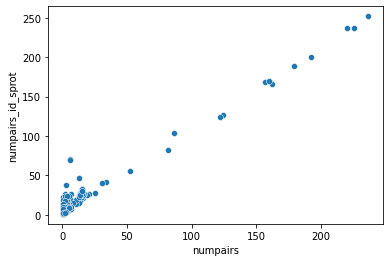

In [43]:
sns.scatterplot(data=df_numpairs,x="numpairs",y="numpairs_id_sprot")

<function matplotlib.pyplot.show(close=None, block=None)>

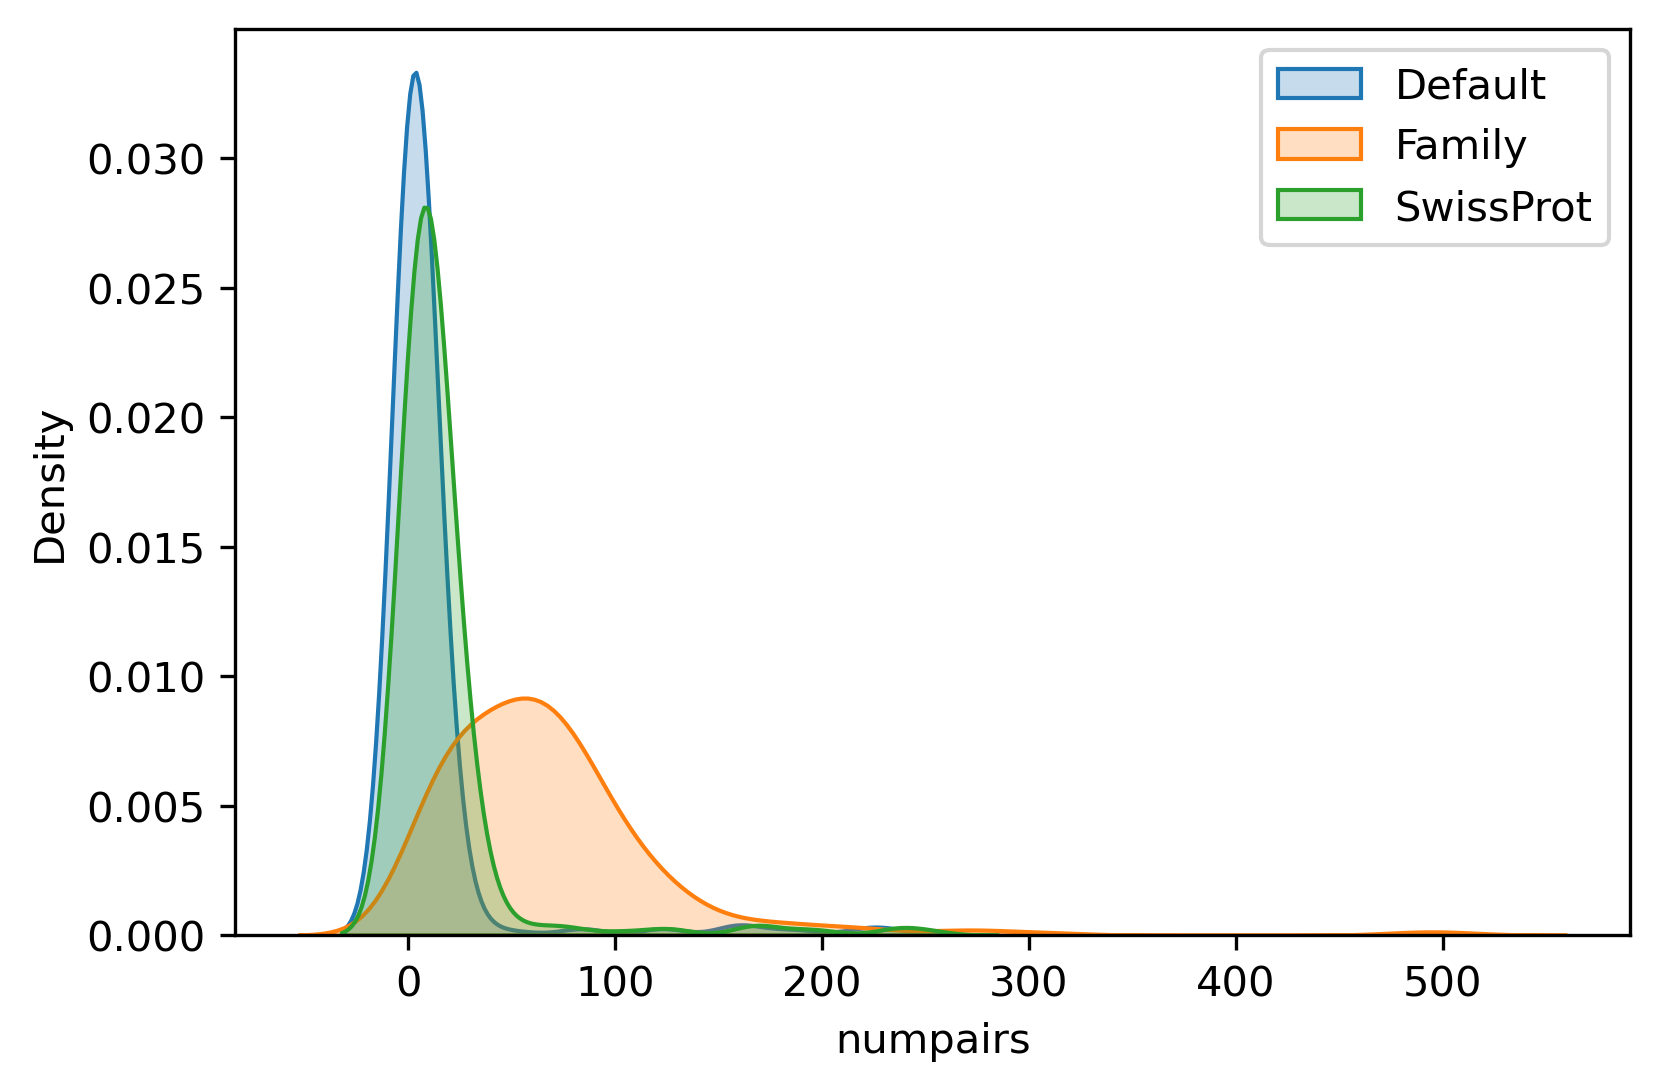

In [49]:
plt.figure(dpi=300)
sns.kdeplot(data=df_numpairs,x="numpairs",label="Default",shade=True)
sns.kdeplot(data=df_numpairs,x="numpairs_id",label="Family",shade=True)
sns.kdeplot(data=df_numpairs,x="numpairs_id_sprot",label="SwissProt",shade=True)
plt.legend()
plt.show

In [34]:
dataframe_new=pd.merge(dataframe,df_numpairs,on="id")
dataframe_new.sort_values(by="numpairs_id")
dataframe_new

id      ipTM       pTM        PAE      plDDT  RankConf  Rank  \
0    O43169_P04488  0.157472  0.336192  26.190832  52.437701  0.193216   1.0   
1    O43169_P10218  0.266759  0.474789  22.265968  62.010419  0.308365   1.0   
2    O43852_P10185  0.187143  0.482329  22.106945  54.340391  0.246180   1.0   
3    O43852_P10211  0.214506  0.387677  26.271997  61.708195  0.249140   1.0   
4    O75396_P04487  0.098790  0.430060  24.197433  61.303021  0.165044   1.0   
..             ...       ...       ...        ...        ...       ...   ...   
280  Q07020_P04487  0.072417  0.430997  23.725399  63.607317  0.144133   1.0   
281  Q07020_P10233  0.203869  0.340777  25.428574  50.759958  0.231251   1.0   
282  Q10472_P04488  0.273037  0.525893  22.913319  65.798173  0.323608   1.0   
283  Q13123_P10233  0.278932  0.224070  29.452187  39.447504  0.267959   1.0   
284  Q13641_P10229  0.165395  0.525562  22.011332  65.056584  0.237428   1.0   

    model run    pDockQ  ...  ifPAE_trembl_id25  ifPAEnorm_trembl_id25  \
0       1   1  0.035881  ...          23.550482               0.152759   
1       1   1  0.057911  ...          11.952599               0.411752   
2       1   1  0.162392  ...          18.771889               0.221051   
3       1   1  0.102587  ...          22.937274               0.159714   
4       1   1  0.026073  ...           0.000000               1.000000   
..    ...  ..       ...  ...                ...                    ...   
280     1   1  0.023771  ...          17.416633               0.247930   
281     1   1  0.244530  ...          14.551177               0.320783   
282     1   1  0.717030  ...          16.421579               0.270513   
283     1   1  0.031149  ...          21.131862               0.182964   
284     1   1  0.617193  ...          12.621171               0.385663   

     ifPLDDT_trembl_id25  ifRes_trembl_id25  pDockQ1_trembl_id25  numpairs  \
0              53.981250           0.082461                0.083      14.0   
1              70.493462           0.290258                0.068       1.0   
2              51.175125           0.113123                0.103       2.0   
3              55.814590           0.089144                0.094       3.0   
4               0.000000           0.000000                0.000       1.0   
..                   ...                ...                  ...       ...   
280            52.468205           0.130085                0.061       1.0   
281            57.612500           0.184811                0.113       3.0   
282            60.714336           0.164240                0.345      15.0   
283            37.174309           0.068016                0.042       2.0   
284            76.443000           0.294812                0.298     236.0   

     numpairs_id  numpairs_dupl  numpairs_dupl_sprot  numpairs_id_sprot  
0             54           17.0                   17                 21  
1             60           13.0                    5                  5  
2             58           13.0                    8                  8  
3             80           21.0                   12                 12  
4              8            1.0                    2                  2  
..           ...            ...                  ...                ...  
280           13            1.0                    2                  2  
281           53           11.0                    4                  4  
282           91           20.0                   26                 30  
283           15            3.0                    2                  2  
284          271          239.0                  244                252  

[285 rows x 231 columns]

In [35]:
#pd.set_option('display.max_rows', 5)
#pd.set_option('display.max_columns', 10)
print(dataframe.keys())

Index(['id', 'ipTM', 'pTM', 'PAE', 'plDDT', 'RankConf', 'Rank', 'model', 'run',
       'pDockQ',
       ...
       'Rank_trembl_id25', 'model_trembl_id25', 'run_trembl_id25',
       'pDockQ_trembl_id25', 'pDockQ2_trembl_id25', 'ifPAE_trembl_id25',
       'ifPAEnorm_trembl_id25', 'ifPLDDT_trembl_id25', 'ifRes_trembl_id25',
       'pDockQ1_trembl_id25'],
      dtype='object', length=226)


In [36]:
sns.scatterplot(data=dataframe,x="pDockQ2",y="pDockQ2_family",label="Family")
sns.scatterplot(data=dataframe,x="pDockQ2",y="pDockQ2_subfamily",label="SubFamily")
sns.scatterplot(data=dataframe,x="pDockQ2",y="pDockQ2_order",label="Order") 
sns.scatterplot(data=dataframe,x="pDockQ2",y="pDockQ2_genus",label="Genus") 
plt.plot([0,.6],[0,0.6],color='black')

ValueError: Could not interpret value `pDockQ2_family` for parameter `y`

<AxesSubplot:xlabel='pDockQ2', ylabel='pDockQ2_25'>

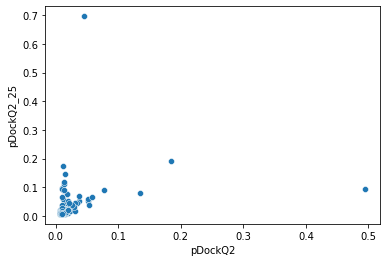

In [ ]:
sns.scatterplot(data=dataframe,x="pDockQ2",y="pDockQ2_25")


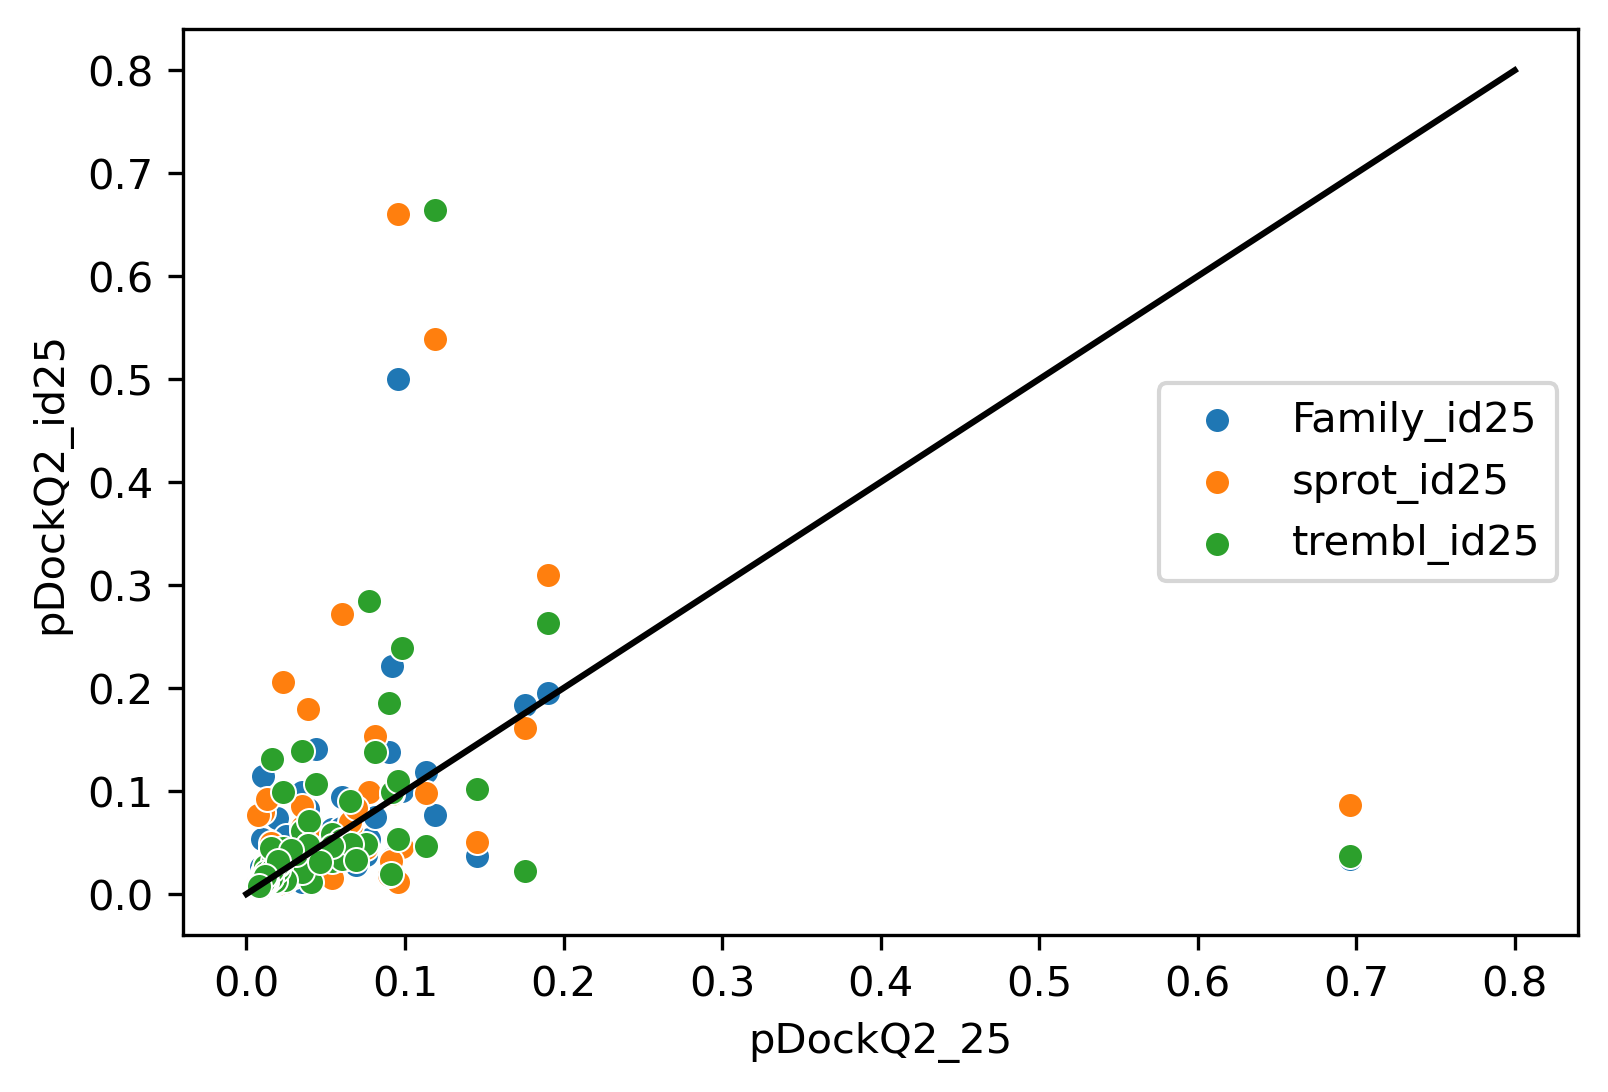

In [50]:
plt.figure(dpi=300)
#sns.scatterplot(data=dataframe,x="pDockQ2_25",y="pDockQ2_25",label="25")
sns.scatterplot(data=dataframe,x="pDockQ2_25",y="pDockQ2_id25",label="Family_id25")
#sns.scatterplot(data=dataframe,x="pDockQ2_25",y="pDockQ2_dupl25",label="Family_dupl25")
sns.scatterplot(data=dataframe,x="pDockQ2_25",y="pDockQ2_sprot_id25",label="sprot_id25")
#sns.scatterplot(data=dataframe,x="pDockQ2_25",y="pDockQ2_sprot_dupl25",label="sprot_dupl25")
sns.scatterplot(data=dataframe,x="pDockQ2_25",y="pDockQ2_trembl_id25",label="trembl_id25")
#sns.scatterplot(data=dataframe,x="pDockQ2_25",y="pDockQ2_trembl_dupl25",label="trembl_dupl25")
plt.plot([0,.8],[0,0.8],color='black')
plt.show()

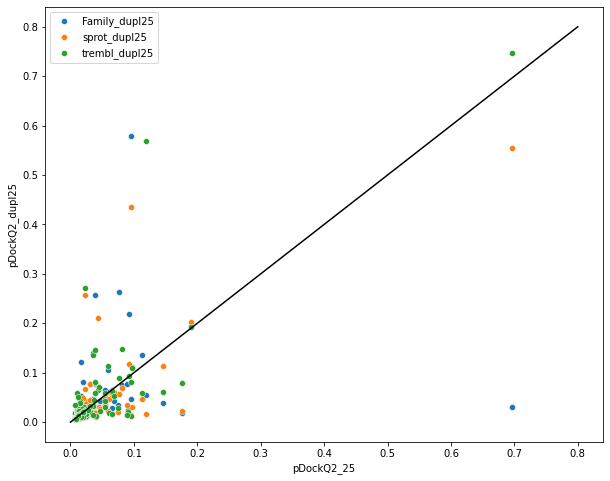

In [ ]:
plt.figure(figsize=(10,8))
#sns.scatterplot(data=dataframe,x="pDockQ2_25",y="pDockQ2_25",label="25")
#sns.scatterplot(data=dataframe,x="pDockQ2_25",y="pDockQ2_id25",label="Family_id25")
sns.scatterplot(data=dataframe,x="pDockQ2_25",y="pDockQ2_dupl25",label="Family_dupl25")
#sns.scatterplot(data=dataframe,x="pDockQ2_25",y="pDockQ2_sprot_id25",label="sprot_id25")
sns.scatterplot(data=dataframe,x="pDockQ2_25",y="pDockQ2_sprot_dupl25",label="sprot_dupl25")
#sns.scatterplot(data=dataframe,x="pDockQ2_25",y="pDockQ2_trembl_id25",label="trembl_id25")
sns.scatterplot(data=dataframe,x="pDockQ2_25",y="pDockQ2_trembl_dupl25",label="trembl_dupl25")
plt.plot([0,.8],[0,0.8],color='black')

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=dataframe,x="RankConf",y="RankConf_family",label="Family")
sns.scatterplot(data=dataframe,x="RankConf",y="RankConf_subfamily",label="SubFamily")
sns.scatterplot(data=dataframe,x="RankConf",y="RankConf_order",label="Order") 
sns.scatterplot(data=dataframe,x="RankConf",y="RankConf_genus",label="Genus") 
plt.plot([0,.6],[0,0.6],color='black')

ValueError: Could not interpret value `RankConf_family` for parameter `y`

<Figure size 720x576 with 0 Axes>

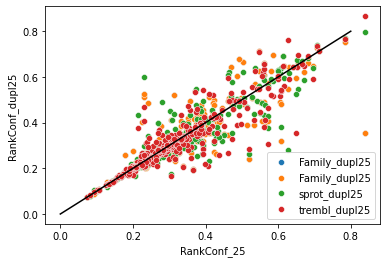

In [ ]:
#sns.scatterplot(data=dataframe,x="RankConf_25",y="RankConf_25",label="25")
#sns.scatterplot(data=dataframe,x="RankConf_25",y="RankConf_id25",label="Family_id25")
sns.scatterplot(data=dataframe,x="RankConf_25",y="RankConf_dupl25",label="Family_dupl25")
#sns.scatterplot(data=dataframe,x="RankConf_25",y="RankConf_id25",label="Family_id25")
sns.scatterplot(data=dataframe,x="RankConf_25",y="RankConf_dupl25",label="Family_dupl25")
#sns.scatterplot(data=dataframe,x="RankConf_25",y="RankConf_sprot_id25",label="sprot_id25")
sns.scatterplot(data=dataframe,x="RankConf_25",y="RankConf_sprot_dupl25",label="sprot_dupl25")
#sns.scatterplot(data=dataframe,x="RankConf_25",y="RankConf_trembl_id25",label="trembl_id25")
sns.scatterplot(data=dataframe,x="RankConf_25",y="RankConf_trembl_dupl25",label="trembl_dupl25")
plt.plot([0,.8],[0,0.8],color='black')

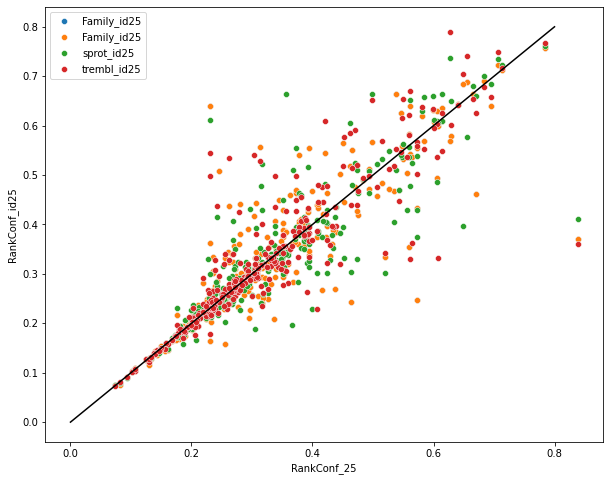

In [ ]:
plt.figure(figsize=(10,8))
#sns.scatterplot(data=dataframe,x="RankConf_25",y="RankConf_25",label="25")
sns.scatterplot(data=dataframe,x="RankConf_25",y="RankConf_id25",label="Family_id25")
#sns.scatterplot(data=dataframe,x="RankConf_25",y="RankConf_dupl25",label="Family_dupl25")
sns.scatterplot(data=dataframe,x="RankConf_25",y="RankConf_id25",label="Family_id25")
#sns.scatterplot(data=dataframe,x="RankConf_25",y="RankConf_dupl25",label="Family_dupl25")
sns.scatterplot(data=dataframe,x="RankConf_25",y="RankConf_sprot_id25",label="sprot_id25")
#sns.scatterplot(data=dataframe,x="RankConf_25",y="RankConf_sprot_dupl25",label="sprot_dupl25")
sns.scatterplot(data=dataframe,x="RankConf_25",y="RankConf_trembl_id25",label="trembl_id25")
#sns.scatterplot(data=dataframe,x="RankConf_25",y="RankConf_trembl_dupl25",label="trembl_dupl25")
plt.plot([0,.8],[0,0.8],color='black')

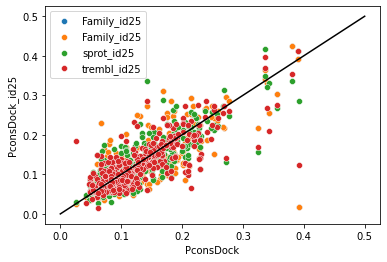

In [ ]:
#sns.scatterplot(data=dataframe,x="PconsDock",y="PconsDock_25",label="25")
sns.scatterplot(data=dataframe,x="PconsDock",y="PconsDock_id25",label="Family_id25")
#sns.scatterplot(data=dataframe,x="PconsDock",y="PconsDock_dupl25",label="Family_dupl25")
sns.scatterplot(data=dataframe,x="PconsDock",y="PconsDock_id25",label="Family_id25")
#sns.scatterplot(data=dataframe,x="PconsDock",y="PconsDock_dupl25",label="Family_dupl25")
sns.scatterplot(data=dataframe,x="PconsDock",y="PconsDock_sprot_id25",label="sprot_id25")
#sns.scatterplot(data=dataframe,x="PconsDock",y="PconsDock_sprot_dupl25",label="sprot_dupl25")
sns.scatterplot(data=dataframe,x="PconsDock",y="PconsDock_trembl_id25",label="trembl_id25")
#sns.scatterplot(data=dataframe,x="PconsDock",y="PconsDock_trembl_dupl25",label="trembl_dupl25")
plt.plot([0,.5],[0,0.5],color='black')

In [ ]:
dataframe.loc[dataframe["PconsDock"]>0.37]

id      ipTM       pTM        PAE      plDDT  RankConf  \
205  P42766_P04487  0.060313  0.376010  24.572437  65.436261  0.123453   
249  P62857_P10233  0.287254  0.336272  25.360912  46.104936  0.297058   
297  Q15056_P10225  0.649703  0.642282  19.862383  63.791171  0.648219   

       pDockQ   pDockQ2      ifPAE  ifPAEnorm  ...  Rank_trembl_id25  \
205  0.023756  0.007325   0.000000   1.000000  ...               1.0   
249  0.034263  0.018690  13.569522   0.351949  ...               1.0   
297  0.359269  0.494017   2.833706   0.925670  ...               1.0   

     model_trembl_id25  run_trembl_id25  pDockQ_trembl_id25  \
205                  1                5            0.023733   
249                  1                1            0.039784   
297                  5                5            0.298154   

     pDockQ2_trembl_id25  ifPAE_trembl_id25  ifPAEnorm_trembl_id25  \
205             0.007325           0.000000               1.000000   
249             0.021703          13.202978               0.364540   
297             0.109905           6.079820               0.730118   

     ifPLDDT_trembl_id25  ifRes_trembl_id25  PconsDock_trembl_id25  
205             0.000000           0.000000               0.124167  
249            61.315714           0.223520               0.353240  
297            68.910238           0.503126               0.412920  

[3 rows x 207 columns]

<AxesSubplot:xlabel='pDockQ_25', ylabel='pDockQ2_25'>

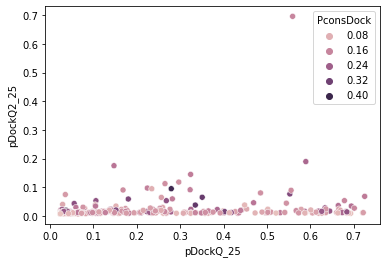

In [ ]:
sns.scatterplot(data=dataframe25,x="pDockQ_25",y="pDockQ2_25",hue="PconsDock")
#sns.scatterplot(data=dataframe,x="pDockQ2_25",y="PconsDock",label="PconsDock_25")


In [ ]:
dataframe.loc[(dataframe["RankConf_25"]<0.6) &  (dataframe["PconsDock"]>0.15)].sort_values("RankConf_25")[["id","ipTM_25","pTM_25","RankConf_25","PconsDock","pDockQ_25","pDockQ2_25"]]

id   ipTM_25    pTM_25  RankConf_25  PconsDock  pDockQ_25  \
205  P42766_P04487  0.062004  0.379823     0.125568   0.392167   0.024484   
244  P62750_P04487  0.097347  0.308792     0.139636   0.152833   0.029799   
49   P06703_P04487  0.136357  0.361017     0.181289   0.208320   0.209232   
196  P35268_P04487  0.138437  0.382549     0.187260   0.191045   0.048696   
253  P62913_P04487  0.120491  0.501321     0.196657   0.258765   0.417698   
..             ...       ...       ...          ...        ...        ...   
128  P10218_P61353  0.541792  0.575149     0.548463   0.271360   0.180413   
62   P07737_P10233  0.581884  0.420608     0.549629   0.166840   0.629145   
268  P67870_P10233  0.573594  0.511371     0.561149   0.336760   0.334776   
7    P01889_P10229  0.581532  0.535601     0.572346   0.226880   0.633765   
246  P62820_P10231  0.542324  0.737202     0.581300   0.229360   0.141060   

     pDockQ2_25  
205    0.009076  
244    0.008594  
49     0.010855  
196    0.009588  
253    0.012421  
..          ...  
128    0.059599  
62     0.015669  
268    0.038533  
7      0.029015  
246    0.023457  

[93 rows x 7 columns]

In [ ]:
dataframe.loc[(dataframe["RankConf_25"]>0.5) & (dataframe["pDockQ_25"]>0.2) ].sort_values("RankConf_25")[["id","ipTM_25","pTM_25","RankConf_25","PconsDock","pDockQ_25","pDockQ2_25"]]

id   ipTM_25    pTM_25  RankConf_25  PconsDock  pDockQ_25  \
171  P20340_P10233  0.514520  0.473746     0.506365    0.33876   0.350684   
74   P09382_P10233  0.562439  0.385668     0.527084    0.20180   0.586632   
83   P0DP25_P04488  0.590830  0.347695     0.542203    0.10912   0.253087   
142  P10599_P10233  0.579249  0.413586     0.546116    0.22808   0.322821   
62   P07737_P10233  0.581884  0.420608     0.549629    0.16684   0.629145   
144  P11142_P03170  0.502995  0.787548     0.559906    0.13864   0.544585   
268  P67870_P10233  0.573594  0.511371     0.561149    0.33676   0.334776   
7    P01889_P10229  0.581532  0.535601     0.572346    0.22688   0.633765   
65   P08133_P06487  0.559512  0.626702     0.572950    0.08448   0.234427   
147  P11142_P10233  0.557397  0.636628     0.573243    0.06608   0.669355   
149  P12004_P10226  0.623858  0.428860     0.584859    0.10304   0.508870   
262  P62979_P06485  0.589166  0.647485     0.600830    0.18828   0.323967   
197  P35268_P10233  0.647635  0.442043     0.606517    0.13836   0.485021   
123  P10218_O75396  0.616167  0.609599     0.614853    0.19052   0.264918   
124  P10218_P10599  0.634618  0.596787     0.627052    0.12124   0.296670   
207  P45983_P04294  0.674354  0.501204     0.639724    0.16208   0.618756   
215  P50454_P10229  0.615206  0.780561     0.648277    0.13024   0.555491   
25   P04488_P06703  0.710522  0.431936     0.654805    0.15576   0.224323   
61   P07737_P08543  0.664639  0.668764     0.665464    0.23160   0.206424   
60   P07737_P04487  0.709388  0.517135     0.670937    0.21412   0.552607   
240  P62136_P10233  0.718704  0.542302     0.683424    0.19908   0.701215   
332  Q9GZQ8_P10233  0.775148  0.373375     0.694793    0.21028   0.469071   
258  P62937_P04487  0.742696  0.563027     0.706762    0.26644   0.589472   
297  Q15056_P10225  0.726384  0.661915     0.713490    0.39052   0.279341   
301  Q16531_P10231  0.800337  0.721538     0.784577    0.21880   0.725113   
256  P62937_P03170  0.859159  0.755277     0.838383    0.07864   0.559024   

     pDockQ2_25  
171    0.065660  
74     0.017216  
83     0.027275  
142    0.091843  
62     0.015669  
144    0.045106  
268    0.038533  
7      0.029015  
65     0.095368  
147    0.019892  
149    0.014107  
262    0.145425  
197    0.080767  
123    0.113182  
124    0.118603  
207    0.017554  
215    0.089847  
25     0.097813  
61     0.012786  
60     0.077253  
240    0.027748  
332    0.046514  
258    0.190019  
297    0.095532  
301    0.068810  
256    0.696044

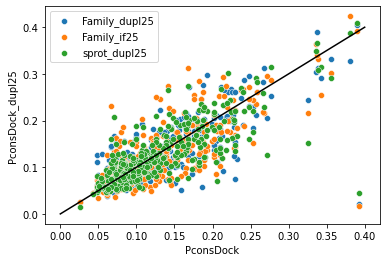

In [ ]:
sns.scatterplot(data=dataframe,x="PconsDock",y="PconsDock_dupl25",label="Family_dupl25")
sns.scatterplot(data=dataframe,x="PconsDock",y="PconsDock_id25",label="Family_if25")
sns.scatterplot(data=dataframe,x="PconsDock",y="PconsDock_sprot_dupl25",label="sprot_dupl25")
plt.plot([0,.4],[0,0.4],color='black')

In [ ]:
dataframe[dataframe.PconsDock>0.35][["id","pDockQ2_25","PconsDock","pDockQ2_dupl25","PconsDock_dupl25"]]

id  pDockQ2_25  PconsDock  pDockQ2_dupl25  PconsDock_dupl25
205  P42766_P04487    0.009076   0.392167        0.007325           0.02100
249  P62857_P10233    0.020359   0.380240        0.018368           0.32732
286  Q03518_P03170    0.015754   0.355560        0.015840           0.33184
297  Q15056_P10225    0.095532   0.390520        0.579671           0.40372

In [ ]:
dataframe.filter(regex="PconsDock.*").describe()

PconsDock  PconsDock_dupl25  PconsDock_id25  PconsDock_sprot_dupl25  \
count  340.000000        339.000000      339.000000              339.000000   
mean     0.130674          0.126969        0.127897                0.127781   
std      0.065555          0.064912        0.065695                0.063599   
min      0.026500          0.021000        0.017333                0.015000   
25%      0.083080          0.079120        0.082220                0.081880   
50%      0.112540          0.111320        0.111840                0.113200   
75%      0.167020          0.162860        0.156300                0.159220   
max      0.392167          0.403720        0.423520                0.408000   

       PconsDock_sprot_id25  PconsDock_trembl_dupl25  PconsDock_trembl_id25  
count            339.000000               339.000000             339.000000  
mean               0.130277                 0.127930               0.126418  
std                0.065420                 0.064538               0.062555  
min                0.027792                 0.001870               0.015783  
25%                0.084820                 0.082840               0.079320  
50%                0.114080                 0.110200               0.112440  
75%                0.164960                 0.160300               0.156240  
max                0.416800                 0.442840               0.412920

In [ ]:
print ("Default:",len(dataframe.loc[(dataframe["RankConf_25"]>0.5) & (dataframe["pDockQ_25"]>0.2)]))
print ("Family_id:",len(dataframe.loc[(dataframe["RankConf_id25"]>0.5) & (dataframe["pDockQ_id25"]>0.2)]))
print ("Family_dupl:",len(dataframe.loc[(dataframe["RankConf_dupl25"]>0.5) & (dataframe["pDockQ_dupl25"]>0.2)]))
print ("Sprot_id:",len(dataframe.loc[(dataframe["RankConf_sprot_id25"]>0.5) & (dataframe["pDockQ_sprot_id25"]>0.2)]))
print ("Sprot_dupl:",len(dataframe.loc[(dataframe["RankConf_sprot_dupl25"]>0.5) & (dataframe["pDockQ_sprot_dupl25"]>0.2)]))
print ("Trembl_id:",len(dataframe.loc[(dataframe["RankConf_trembl_id25"]>0.5) & (dataframe["pDockQ_trembl_id25"]>0.2)]))
print ("Trembl_dupl:",len(dataframe.loc[(dataframe["RankConf_trembl_dupl25"]>0.5) & (dataframe["pDockQ_trembl_dupl25"]>0.2)]))


Default: 26
Family_id: 26
Family_dupl: 27
Sprot_id: 28
Sprot_dupl: 26
Trembl_id: 33
Trembl_dupl: 25


In [ ]:
dataframe.loc[((dataframe["RankConf_25"]>0.5) & (dataframe["pDockQ_25"]>0.2)) |
((dataframe["RankConf_id25"]>0.5) & (dataframe["pDockQ_id25"]>0.2)) |
((dataframe["RankConf_dupl25"]>0.5) & (dataframe["pDockQ_dupl25"]>0.2)) |
((dataframe["RankConf_sprot_id25"]>0.5) & (dataframe["pDockQ_sprot_id25"]>0.2)) |
((dataframe["RankConf_sprot_dupl25"]>0.5) & (dataframe["pDockQ_sprot_dupl25"]>0.2))| 
((dataframe["RankConf_trembl_id25"]>0.5) & (dataframe["pDockQ_trembl_id25"]>0.2))|
((dataframe["RankConf_trembl_dupl25"]>0.5) & (dataframe["pDockQ_trembl_dupl25"]>0.2))].filter(regex="RankConf.*|^id").sort_values("RankConf_25")


id  RankConf  RankConf_family  RankConf_subfamily  \
319  Q99877_P03170  0.170835         0.156678            0.170835   
111  P10211_P50454  0.206949         0.241583            0.206949   
259  P62937_P10226  0.217513         0.216175            0.217513   
232  P60953_P06487  0.249179         0.218744            0.249179   
267  P63241_P10233  0.196380         0.190720            0.196380   
228  P60709_P04487  0.312981         0.268901            0.312981   
318  Q96AG4_P10218  0.356348         0.361611            0.356348   
260  P62937_P10233  0.270442         0.254285            0.270442   
335  Q9H299_P10233  0.276986         0.271311            0.276986   
186  P27797_P10185  0.260748         0.289792            0.260748   
291  Q10472_P04488  0.323608         0.315984            0.323608   
67   P08134_P10233  0.285383         0.310741            0.285383   
41   P05023_P04488  0.300690         0.303134            0.300690   
19   P04406_P10233  0.316744         0.310463            0.316744   
145  P11142_P04487  0.422554         0.340835            0.422554   
46   P06487_P62937  0.454808         0.376302            0.454808   
81   P0DMV9_P04487  0.361118         0.325597            0.361118   
37   P04488_Q9H0U4  0.224485         0.238625            0.224485   
141  P10599_P10226  0.504862         0.283853            0.504862   
171  P20340_P10233  0.506000         0.533796            0.506000   
74   P09382_P10233  0.267496         0.329946            0.267496   
15   P04294_P61981  0.519424         0.556511            0.519424   
83   P0DP25_P04488  0.334926         0.489597            0.334926   
142  P10599_P10233  0.490743         0.312639            0.490743   
128  P10218_P61353  0.270133         0.246014            0.270133   
62   P07737_P10233  0.284356         0.259780            0.284356   
169  P18085_Q69091  0.232714         0.203995            0.232714   
28   P04488_P20340  0.281334         0.205150            0.281334   
144  P11142_P03170  0.427555         0.353155            0.427555   
268  P67870_P10233  0.627990         0.601773            0.627990   
7    P01889_P10229  0.527101         0.562966            0.527101   
65   P08133_P06487  0.213390         0.671623            0.213390   
147  P11142_P10233  0.234303         0.255115            0.234303   
149  P12004_P10226  0.425650         0.365869            0.425650   
262  P62979_P06485  0.307666         0.303606            0.307666   
167  P18085_P04488  0.227897         0.265889            0.227897   
197  P35268_P10233  0.631611         0.520495            0.631611   
123  P10218_O75396  0.255494         0.205003            0.255494   
124  P10218_P10599  0.208715         0.224159            0.208715   
207  P45983_P04294  0.641549         0.623212            0.641549   
215  P50454_P10229  0.329643         0.298489            0.329643   
25   P04488_P06703  0.253217         0.326537            0.253217   
61   P07737_P08543  0.669964         0.634272            0.669964   
60   P07737_P04487  0.322891         0.204628            0.322891   
240  P62136_P10233  0.612548         0.593704            0.612548   
332  Q9GZQ8_P10233  0.562013         0.538236            0.562013   
258  P62937_P04487  0.682093         0.594984            0.682093   
297  Q15056_P10225  0.648219         0.664969            0.648219   
301  Q16531_P10231  0.737752         0.355589            0.737752   
256  P62937_P03170  0.295991         0.288520            0.295991   

     RankConf_order  RankConf_genus  RankConf_family_dupl  RankConf_family_id  \
319        0.160465        0.169630              0.188956            0.157668   
111        0.237543        0.244172              0.209288            0.248385   
259        0.213100        0.218856              0.214011            0.215839   
232        0.198603        0.221830              0.206061            0.201675   
267        0.186498        0.176336              0.176393            0.184474   
228       

In [ ]:
filtered_df = dataframe.filter(regex="RankConf.*25")
filtered_df = filtered_df[filtered_df > 0.5].dropna()

filtered_df.describe()

RankConf_25  RankConf_dupl25  RankConf_id25  RankConf_sprot_dupl25  \
count    22.000000        22.000000      22.000000              22.000000   
mean      0.624784         0.653773       0.638714               0.635516   
std       0.064621         0.047736       0.053815               0.060521   
min       0.537222         0.569528       0.555369               0.548087   
25%       0.574584         0.627013       0.608579               0.588715   
50%       0.614592         0.647928       0.637503               0.633607   
75%       0.662799         0.683252       0.664060               0.671639   
max       0.784577         0.751167       0.757539               0.771044   

       RankConf_sprot_id25  RankConf_trembl_dupl25  RankConf_trembl_id25  
count            22.000000               22.000000             22.000000  
mean              0.636505                0.631399              0.636613  
std               0.069575                0.069343              0.065110  
min               0.509294                0.515517              0.546313  
25%               0.585400                0.589208              0.596978  
50%               0.650155                0.638510              0.634956  
75%               0.682871                0.681629              0.667087  
max               0.762050                0.767690              0.766483

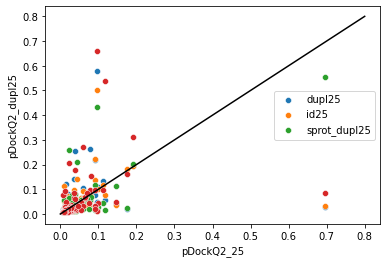

In [ ]:
sns.scatterplot(data=dataframe,x="pDockQ2_25",y="pDockQ2_dupl25",label="dupl25")
sns.scatterplot(data=dataframe,x="pDockQ2_25",y="pDockQ2_id25",label="id25")
sns.scatterplot(data=dataframe,x="pDockQ2_25",y="pDockQ2_sprot_dupl25",label="sprot_dupl25")
sns.scatterplot(data=dataframe,x="pDockQ2_25",y="pDockQ2_sprot_id25",label="_sprot_id25")
plt.plot([0,0.8] ,[0,0.8],color='black')

In [ ]:
dataframe[dataframe.pDockQ2_sprot_dupl25>0.2]

id      ipTM       pTM        PAE      plDDT  RankConf  \
126  P10218_P39023  0.388826  0.634247  18.103900  73.405382  0.437910   
145  P11142_P04487  0.353113  0.700315  16.683784  74.772240  0.422554   
256  P62937_P03170  0.197817  0.688686  14.323774  72.515898  0.295991   
258  P62937_P04487  0.711304  0.565248  19.746590  73.109725  0.682093   
297  Q15056_P10225  0.649703  0.642282  19.862383  63.791171  0.648219   

       pDockQ   pDockQ2      ifPAE  ifPAEnorm  ...  Rank_trembl_id25  \
126  0.091549  0.034753  10.934739   0.455439  ...               1.0   
145  0.307187  0.018454  14.202276   0.331450  ...               1.0   
256  0.479471  0.044991   8.484909   0.581417  ...               1.0   
258  0.610265  0.184760   5.198381   0.787258  ...               1.0   
297  0.359269  0.494017   2.833706   0.925670  ...               1.0   

     model_trembl_id25  run_trembl_id25  pDockQ_trembl_id25  \
126                  3                2            0.100757   
145                  3                1            0.374620   
256                  4                4            0.531894   
258                  1                1            0.623647   
297                  5                5            0.298154   

     pDockQ2_trembl_id25  ifPAE_trembl_id25  ifPAEnorm_trembl_id25  \
126             0.106593           6.798958               0.683874   
145             0.099321           6.530810               0.701009   
256             0.036531           9.659607               0.517309   
258             0.263343           4.309125               0.843394   
297             0.109905           6.079820               0.730118   

     ifPLDDT_trembl_id25  ifRes_trembl_id25  PconsDock_trembl_id25  
126            72.802500           0.497877                0.28508  
145            69.297250           0.485780                0.16960  
256            60.949038           0.315295                0.13008  
258            78.115000           0.658817                0.25648  
297            68.910238           0.503126                0.41292  

[5 rows x 207 columns]

In [ ]:
dataframe.loc[dataframe['pDockQ2']>0.3][["id","pDockQ2","pDockQ2_family","pDockQ2_subfamily","pDockQ2_order","pDockQ2_genus"]]

id   pDockQ2  pDockQ2_family  pDockQ2_subfamily  \
297  Q15056_P10225  0.494017        0.131618           0.494017   

     pDockQ2_order  pDockQ2_genus  
297       0.327252       0.410837

In [ ]:
dataframe.loc[dataframe['RankConf']>0.5][["id","RankConf","pDockQ2","pDockQ2_family","pDockQ2_subfamily","pDockQ2_order","pDockQ2_genus"]]

id  RankConf   pDockQ2  pDockQ2_family  pDockQ2_subfamily  \
7    P01889_P10229  0.527101  0.021767        0.018444           0.021767   
15   P04294_P61981  0.519424  0.012862        0.012115           0.012862   
36   P04488_Q9GZQ8  0.608807  0.012891        0.013501           0.012891   
61   P07737_P08543  0.669964  0.013788        0.011838           0.013788   
141  P10599_P10226  0.504862  0.051276        0.014248           0.051276   
171  P20340_P10233  0.506000  0.057880        0.064175           0.057880   
197  P35268_P10233  0.631611  0.135525        0.021417           0.135525   
207  P45983_P04294  0.641549  0.015087        0.014767           0.015087   
240  P62136_P10233  0.612548  0.021910        0.020041           0.021910   
258  P62937_P04487  0.682093  0.184760        0.104588           0.184760   
268  P67870_P10233  0.627990  0.053488        0.066513           0.053488   
297  Q15056_P10225  0.648219  0.494017        0.131618           0.494017   
301  Q16531_P10231  0.737752  0.037136        0.011235           0.037136   
332  Q9GZQ8_P10233  0.562013  0.020826        0.027003           0.020826   

     pDockQ2_order  pDockQ2_genus  
7         0.020378       0.018784  
15        0.012306       0.011934  
36        0.012071       0.013143  
61        0.011847       0.012530  
141       0.012870       0.014070  
171       0.028131       0.058709  
197       0.033884       0.011738  
207       0.015601       0.013620  
240       0.018534       0.018141  
258       0.194251       0.213568  
268       0.070044       0.012227  
297       0.327252       0.410837  
301       0.010829       0.010441  
332       0.026350       0.015646

In [ ]:
dataframe[["pDockQ2","pDockQ2_genus","pDockQ2_family","pDockQ2_subfamily","pDockQ2_order"]].describe()

pDockQ2  pDockQ2_genus  pDockQ2_family  pDockQ2_subfamily  \
count  341.000000     341.000000      341.000000         341.000000   
mean     0.014754       0.013900        0.012997           0.014754   
std      0.029372       0.025063        0.011323           0.029372   
min      0.007325       0.007325        0.007325           0.007325   
25%      0.009734       0.009672        0.009643           0.009734   
50%      0.010614       0.010556        0.010447           0.010614   
75%      0.012458       0.012291        0.012021           0.012458   
max      0.494017       0.410837        0.131618           0.494017   

       pDockQ2_order  
count     341.000000  
mean        0.014129  
std         0.022512  
min         0.007325  
25%         0.009567  
50%         0.010531  
75%         0.012409  
max         0.327252

In [ ]:
dataframe2=df.merge(df_family,on="id",suffixes=('','_family'))
#dataframe2=dataframe2.merge(df_family_dupl,on="id",suffixes=('','_dupl'))
#dataframe2=dataframe2.merge(df_family_id,on="id",suffixes=('','_id'))

dataframe2.sort_values(by=["pDockQ2"])

id      ipTM       pTM        PAE      plDDT  RankConf  \
247  P62241_P04487  0.075397  0.534902  21.507256  69.026587  0.167298   
259  P62913_P04487  0.080156  0.489032  22.267242  68.765185  0.161932   
271  P63220_P04487  0.086876  0.315150  25.206800  60.755988  0.132531   
272  P63241_P04487  0.089800  0.424495  23.336203  65.564928  0.156739   
249  P62424_P04487  0.078568  0.449339  23.472574  63.912396  0.152722   
..             ...       ...       ...        ...        ...       ...   
177  P20340_P10233  0.514009  0.473964  23.011295  55.055424  0.506000   
148  P10599_P10233  0.513863  0.398265  23.693424  58.091996  0.490743   
203  P35268_P10233  0.677443  0.448279  23.667099  54.774995  0.631611   
264  P62937_P04487  0.711304  0.565248  19.746590  73.109725  0.682093   
303  Q15056_P10225  0.649703  0.642282  19.862383  63.791171  0.648219   

       pDockQ   pDockQ2     ifPAE  ifPAEnorm  ...  pTM_family  PAE_family  \
247  0.023733  0.007325  0.000000   1.000000  ...    0.538686   21.314870   
259  0.023733  0.007325  0.000000   1.000000  ...    0.496214   22.399498   
271  0.023733  0.007325  0.000000   1.000000  ...    0.314257   25.213660   
272  0.023733  0.007325  0.000000   1.000000  ...    0.424952   23.442684   
249  0.023733  0.007325  0.000000   1.000000  ...    0.453432   24.095663   
..        ...       ...       ...        ...  ...         ...         ...   
177  0.275982  0.057880  8.637220   0.572733  ...    0.478772   22.942207   
148  0.240129  0.076742  9.063141   0.549027  ...    0.353656   24.261763   
203  0.471582  0.135525  6.308632   0.715314  ...    0.414712   23.919733   
264  0.610265  0.184760  5.198381   0.787258  ...    0.556209   20.010387   
303  0.359269  0.494017  2.833706   0.925670  ...    0.647601   19.683138   

     plDDT_family  RankConf_family  pDockQ_family  pDockQ2_family  \
247     69.304315         0.175233       0.028174        0.007325   
259     62.546073         0.162004       0.037079        0.007325   
271     61.452635         0.130747       0.023733        0.007325   
272     64.350303         0.156442       0.023736        0.007325   
249     61.280052         0.145258       0.023867        0.008268   
..            ...              ...            ...             ...   
177     55.111194         0.533796       0.380288        0.064175   
148     57.763458         0.312639       0.155940        0.039228   
203     53.158623         0.520495       0.316315        0.021417   
264     72.755493         0.594984       0.578945        0.104588   
303     63.382215         0.664969       0.120429        0.131618   

     ifPAE_family  ifPAEnorm_family  ifPLDDT_family  ifRes_family  
247      0.000000          1.000000        0.000000      0.000000  
259      0.000000          1.000000        0.000000      0.000000  
271      0.000000          1.000000        0.000000      0.000000  
272      0.000000          1.000000        0.000000      0.000000  
249     29.202021          0.104958       27.995000      0.029383  
..            ...               ...             ...           ...  
177      8.065974          0.605841       67.920606      0.411491  
148     11.182693          0.444341       73.719231      0.327564  
203     13.194049          0.364853       60.602973      0.221112  
264      6.377764          0.710854       69.581429      0.494622  
303      5.694680          0.755119       70.748043      0.534232  

[347 rows x 23 columns]

In [ ]:
df_family.keys()

Index(['id', 'ipTM', 'pTM', 'PAE', 'plDDT', 'RankConf', 'pDockQ', 'pDockQ2',
       'ifPAE', 'ifPAEnorm', 'ifPLDDT', 'ifRes'],
      dtype='object')

In [42]:
sns.scatterplot(data=dataframe,x="pDockQ2",y="pDockQ2_family",label="Family")
sns.scatterplot(data=dataframe,x="pDockQ2",y="pDockQ2_family_dupl",label="Duplicated")
sns.scatterplot(data=dataframe,x="pDockQ2",y="pDockQ2_family_id",label="Identity") 
plt.plot([0,.6],[0,0.6],color='black')

ValueError: Could not interpret value `pDockQ2_family` for parameter `y`

In [ ]:
dataframe2.loc[dataframe.pDockQ2>0.1]

NameError: name 'dataframe2' is not defined

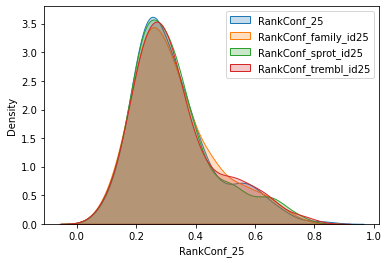

In [41]:
sns.kdeplot(data=dataframe, x="RankConf_25", label="RankConf_25", shade=True)
sns.kdeplot(data=dataframe, x="RankConf_id25", label="RankConf_family_id25", shade=True)
#sns.kdeplot(data=dataframe, x="RankConf_dupl25", label="RankConf_family_dupl25", shade=True)

sns.kdeplot(data=dataframe, x="RankConf_sprot_id25", label="RankConf_sprot_id25", shade=True)
#sns.kdeplot(data=dataframe, x="RankConf_sprot_dupl25", label="RankConf_sprot_dupl25", shade=True)

sns.kdeplot(data=dataframe, x="RankConf_trembl_id25", label="RankConf_trembl_id25", shade=True)
#sns.kdeplot(data=dataframe, x="RankConf_trembl_dupl25", label="RankConf_trembl_dupl25", shade=True)


plt.legend()
plt.show()

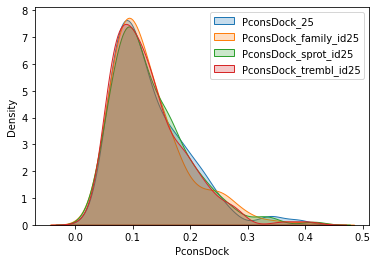

In [ ]:
sns.kdeplot(data=dataframe, x="PconsDock", label="PconsDock_25", shade=True)
sns.kdeplot(data=dataframe, x="PconsDock_id25", label="PconsDock_family_id25", shade=True)
#sns.kdeplot(data=dataframe, x="PconsDock_dupl25", label="PconsDock_family_dupl25", shade=True)

sns.kdeplot(data=dataframe, x="PconsDock_sprot_id25", label="PconsDock_sprot_id25", shade=True)
#sns.kdeplot(data=dataframe, x="PconsDock_sprot_dupl25", label="PconsDock_sprot_dupl25", shade=True)

sns.kdeplot(data=dataframe, x="PconsDock_trembl_id25", label="PconsDock_trembl_id25", shade=True)
#sns.kdeplot(data=dataframe, x="PconsDock_trembl_dupl25", label="PconsDock_trembl_dupl25", shade=True)


plt.legend()
plt.show()

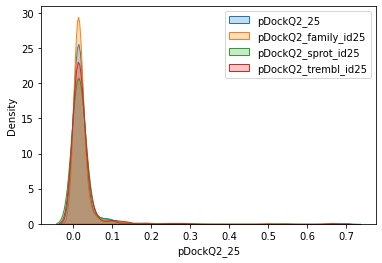

In [ ]:
sns.kdeplot(data=dataframe, x="pDockQ2_25", label="pDockQ2_25", shade=True)
sns.kdeplot(data=dataframe, x="pDockQ2_id25", label="pDockQ2_family_id25", shade=True)
#sns.kdeplot(data=dataframe, x="pDockQ2_dupl25", label="pDockQ2_family_dupl25", shade=True)

sns.kdeplot(data=dataframe, x="pDockQ2_sprot_id25", label="pDockQ2_sprot_id25", shade=True)
#sns.kdeplot(data=dataframe, x="pDockQ2_sprot_dupl25", label="pDockQ2_sprot_dupl25", shade=True)

sns.kdeplot(data=dataframe, x="pDockQ2_trembl_id25", label="pDockQ2_trembl_id25", shade=True)
#sns.kdeplot(data=dataframe, x="pDockQ2_trembl_dupl25", label="pDockQ2_trembl_dupl25", shade=True)


plt.legend()
plt.show()

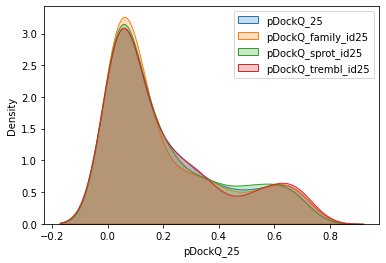

In [ ]:
sns.kdeplot(data=dataframe, x="pDockQ_25", label="pDockQ_25", shade=True)
sns.kdeplot(data=dataframe, x="pDockQ_id25", label="pDockQ_family_id25", shade=True)
#sns.kdeplot(data=dataframe, x="pDockQ_dupl25", label="pDockQ_family_dupl25", shade=True)

sns.kdeplot(data=dataframe, x="pDockQ_sprot_id25", label="pDockQ_sprot_id25", shade=True)
#sns.kdeplot(data=dataframe, x="pDockQ_sprot_dupl25", label="pDockQ_sprot_dupl25", shade=True)

sns.kdeplot(data=dataframe, x="pDockQ_trembl_id25", label="pDockQ_trembl_id25", shade=True)
#sns.kdeplot(data=dataframe, x="pDockQ_trembl_dupl25", label="pDockQ_trembl_dupl25", shade=True)


plt.legend()
plt.show()

In [ ]:
dataframe25.columns

Index(['id', 'ipTM', 'pTM', 'PAE', 'plDDT', 'RankConf', 'Rank', 'model', 'run',
       'pDockQ',
       ...
       'pDockQ_trembl_id25', 'pDockQ2_trembl_id25', 'ifPAE_trembl_id25',
       'ifPAEnorm_trembl_id25', 'ifPLDDT_trembl_id25', 'ifRes_trembl_id25',
       'pDockQ1_trembl_id25', 'Num_trembl_id25', 'Sum_trembl_id25',
       'PconsDock_trembl_id25'],
      dtype='object', length=131)

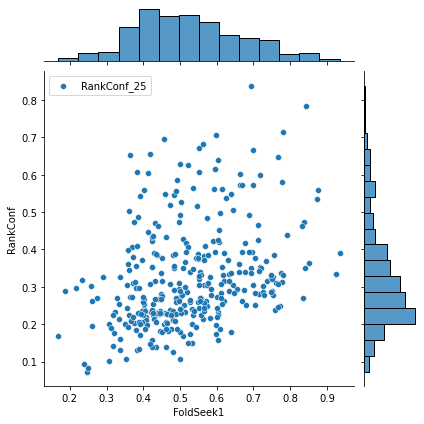

In [ ]:
sns.jointplot(data=dataframe25, y="RankConf", x="FoldSeek1", label="RankConf_25")
#sns.jointplot(data=dataframe25, y="PconsDock", x="RankConf_25", label="RankConf_25",kind="kde")
#sns.jointplot(data=dataframe25, y="PconsDock_id25", x="RankConf_id25", label="RankConf_25")


ValueError: Could not interpret value `PconsDock` for parameter `y`

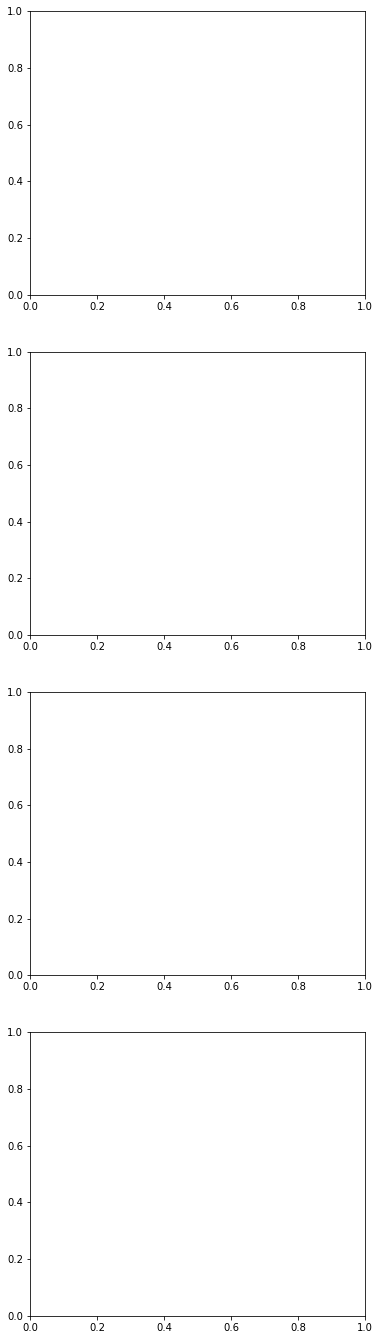

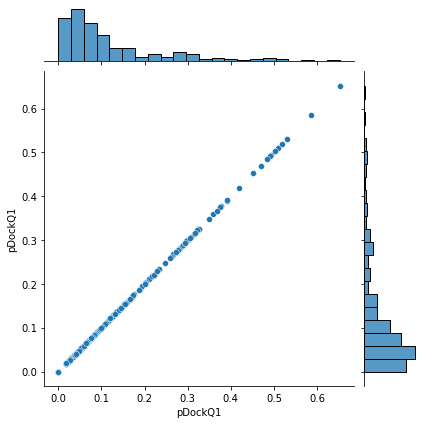

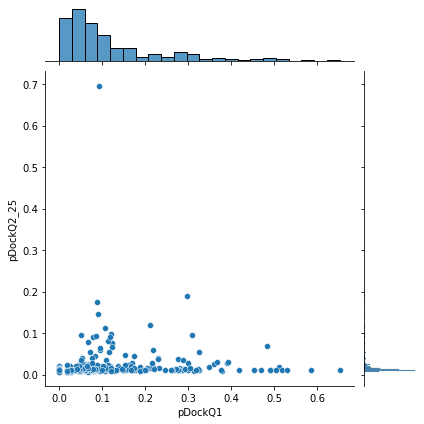

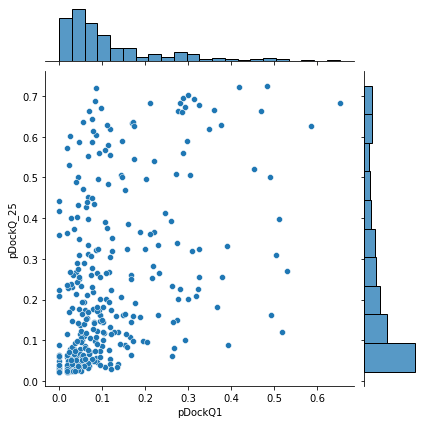

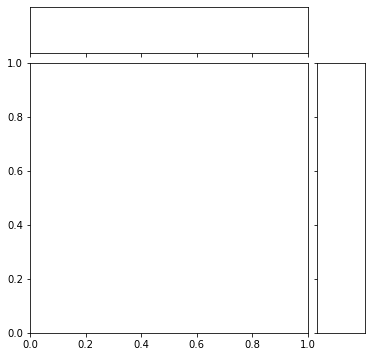

In [37]:

variables = ["pDockQ1", "pDockQ2_25", "pDockQ_25", "PconsDock"]
fig, axs = plt.subplots(len(variables), figsize=(6, 6*len(variables)))

for ax, var1 in zip(axs, variables):
    for ax, var2 in zip(axs, variables):
        sns.jointplot(data=dataframe, x=var1, y=var2, kind="scatter", ax=ax)

plt.tight_layout()
plt.show()

ValueError: Could not interpret value `PconsDock` for parameter `x`

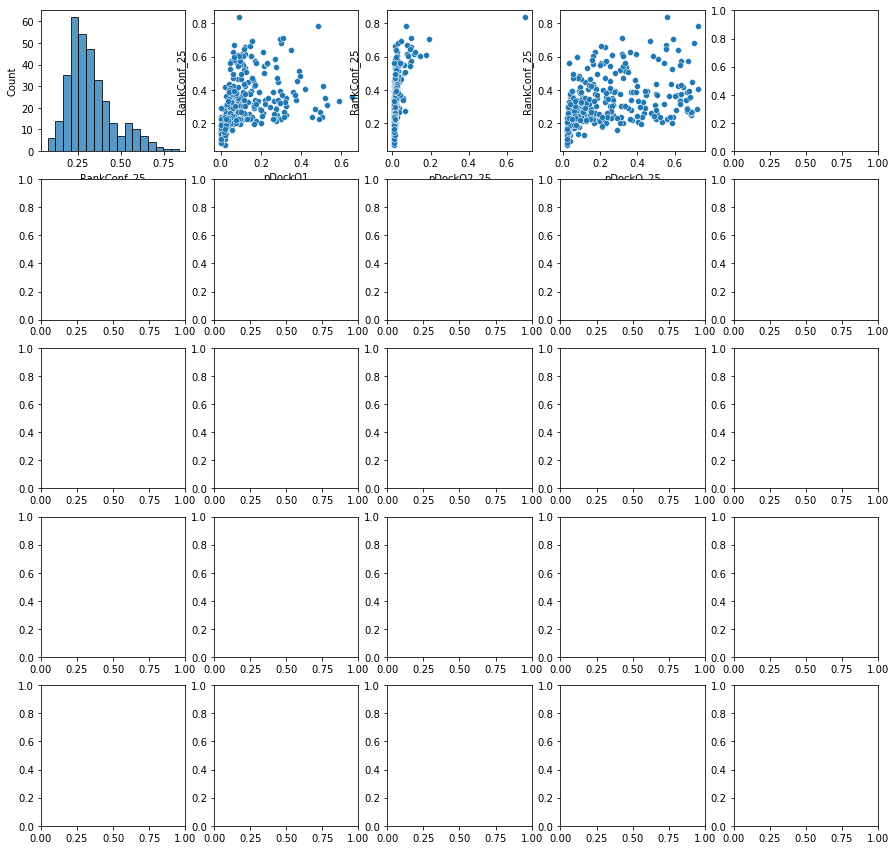

In [38]:
variables = ["RankConf_25", "pDockQ1", "pDockQ2_25", "pDockQ_25", "PconsDock"]
fig, axs = plt.subplots(5, 5, figsize=(15, 15))

for i, var_i in enumerate(variables):
    for j, var_j in enumerate(variables):
        if i == j:
            sns.histplot(data=dataframe, x=var_i, ax=axs[i, j])
        else:
            sns.scatterplot(data=dataframe, x=var_j, y=var_i, ax=axs[i, j])

plt.tight_layout()
plt.show()

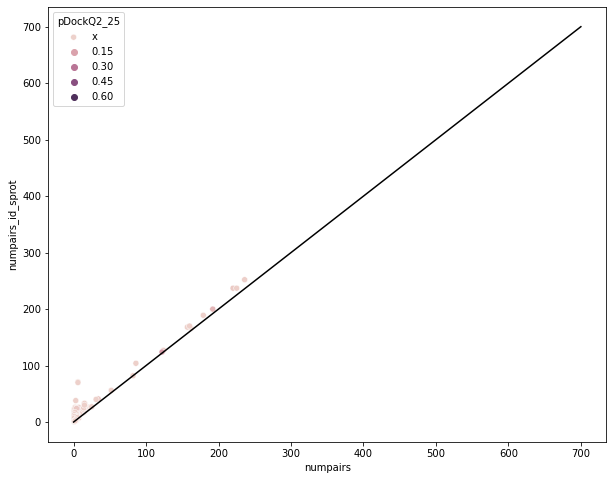

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=dataframe_new,x="numpairs",y="numpairs_id_sprot",label="x",hue="pDockQ2_25")
plt.plot([0,700],[0,700],color='black')

<AxesSubplot:xlabel='pDockQ2_25', ylabel='pDockQ2_id25'>

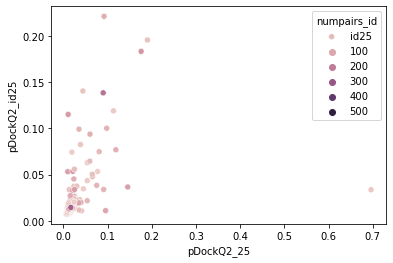

In [ ]:
sns.scatterplot(data=dataframe_new,x="pDockQ2_25",y="pDockQ2_id25",label="id25",hue="numpairs_id")


In [ ]:
sns.scatterplot(data=dataframe,x="pDockQ2",y="pDockQ2_25")
plt.plot([0,0.8] ,[0,0.8],color='black')

In [ ]:
dataframe.loc[dataframe.pDockQ2_25>0.5]

In [ ]:

# Set the plot size to 12x12
plt.figure(figsize=(12, 12))

# Plot your data here

# Show the plot

sns.scatterplot(data=dataframe_new,x="numpairs",y="numpairs_id",label="ID") # , hue="pDockQ2_id")
sns.scatterplot(data=dataframe_new,x="numpairs",y="numpairs_dupl",label="Duplicated")
sns.scatterplot(data=dataframe_new,x="numpairs",y="numpairs_dupl_sprot",label="SprotDupl")
sns.scatterplot(data=dataframe_new,x="numpairs",y="numpairs_id_sprot",label="SprotID")
plt.plot([0,500],[0,500],color='black')
plt.show()


In [ ]:
plt.figure(figsize=(9, 9))
sns.scatterplot(data=dataframe_new,x="numpairs_dupl",y="numpairs_dupl_sprot",label="Sprot")
plt.plot([0,250],[0,250],color='black')


In [ ]:
dataframe.loc[dataframe.numpairs>100].sort_values(by="numpairs")

In [ ]:
sns.scatterplot(data=dataframe,x="pDockQ2",y="pDockQ2_id",hue="numpairs_id",label="Identity")

In [39]:
import py3Dmol


In [40]:
p = py3Dmol.view('../multimer_family_id25/P62937_P03170/ranked_0.pdb')
p.setStyle({'cartoon': {'color':'spectrum'}})
p.setStyle({'chain':'B'}, {'cartoon': {'color':'green'}})
p.setStyle({'chain':'C'}, {'cartoon': {'color':'blue'}})
p

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [ ]:
with open("1crn.pdb") as ifile:
    mol = Molecule(ifile)


In [ ]:
dataframe.loc[dataframe['id']=="Q8WWI1_P08543"][["id","numpairs_dupl","numpairs_id","pDockQ2","pDockQ2_family","pDockQ2_id","pDockQ2_dupl"]]